In [ ]:
# Import the necessary packages
# For generation and organisation of data
import random as r
r.seed(2) # Code Reproductability
import numpy as np
import pandas as pd

# For Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For preprocessing and computation
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [ ]:
# Basic features involved in the data
cols = ['total_size', 'no_of_files', 'network_throughput', 'time_taken']
data = list()

# Generation of the random data
for _ in range(1000):
    # Generate random numbers within a specific range
    size, nt = r.randint(6,195), r.randint(3,98)
    nf = r.randint(1,150)
    time_approx = size/nt if nf<=20 else (1.2 * size/nt if nf<=50 else (1.4 * size/nt if nf<=100 else 1.6 * size/nt))
    # Append the random data generated to the list 'data'
    data.append([
    r.randint(int((size - 5)*10), int((size + 5)*10)) * 0.1,
    r.randint(nf, nf + 25),
    r.randint(int((nt-2)*100), int((nt+2)*100)) * 0.01,
    r.randint(int((time_approx)*10), int((time_approx+5)*10)) * 0.1
])

# Create a pandas DataFrame.
df = pd.DataFrame(data, columns=cols)

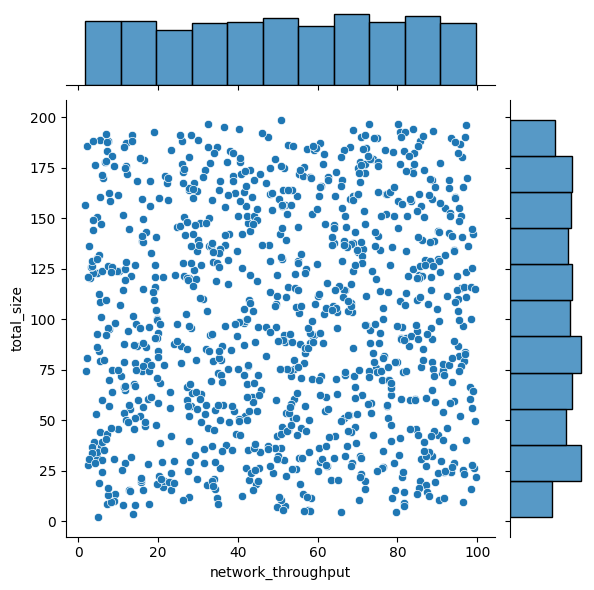

In [ ]:
# Plot showing the distribution of the data
sns.jointplot(x=df.network_throughput, y=df.total_size)

Feature Engineering

In [ ]:
# Add a feature which indicates the ratio of the total size to the network throughput
df['size_to_nt'] = df.total_size / df.network_throughput
df.head()

,total_size,no_of_files,network_throughput,time_taken,size_to_nt
0,19.6,27,15.76,5.9,1.243655
1,86.7,56,35.97,7.6,2.410342
2,50.2,117,57.90,4.6,0.867012
3,114.4,69,66.86,5.3,1.711038
4,88.7,114,51.86,3.8,1.710374



Split the dataset into training and testing data.

In [ ]:
# Split the data for training and testing purpose.
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
len(train_data.index), len(test_data.index)

(800, 200)

Local Outlier Factor Model

In [ ]:
# Model 1: Local Outlier Factor Model
p = Pipeline(steps=[('preprocessor', MinMaxScaler()), # Normalize the training data
 ('model', LocalOutlierFactor(
    n_neighbors=50, # number of nearest neighbors considered
    contamination=0.05, # proportion of the outliers in the data
    metric='minkowski' # distance metric in higher dimensional space
))])

p.fit(train_data) # train the model

Pipeline(steps=[('preprocessor', MinMaxScaler()),
                ('model',
                 LocalOutlierFactor(contamination=0.05, n_neighbors=50))])

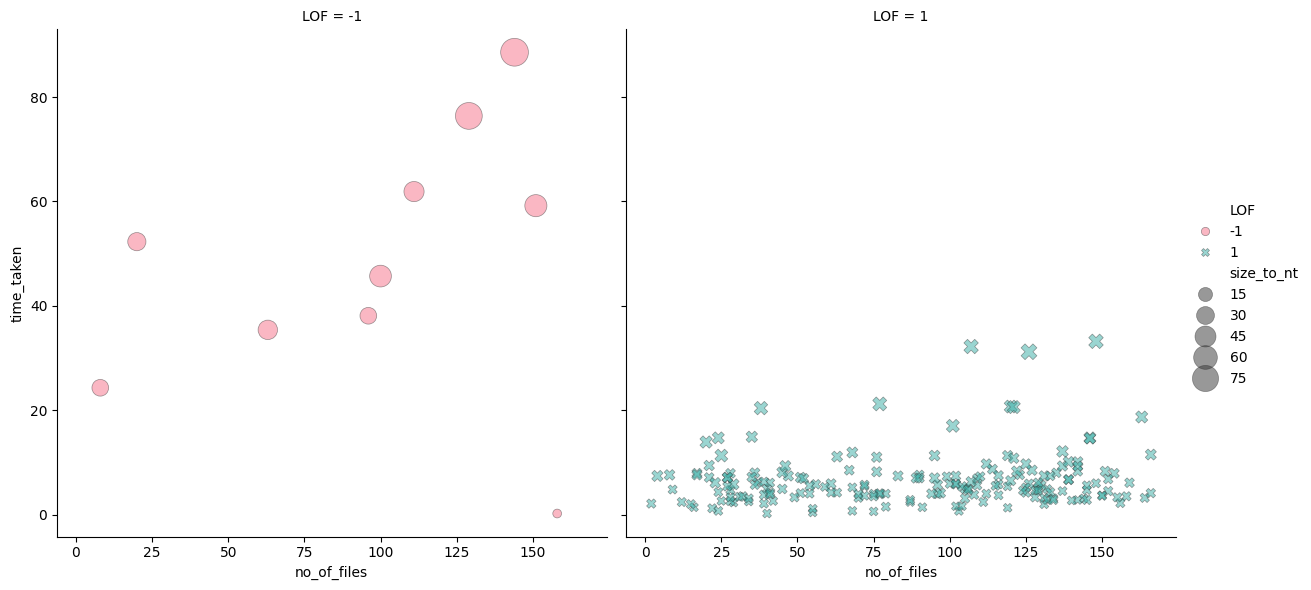

In [ ]:
test_data['LOF'] = p.fit_predict(test_data) # Predict on the test_data

# Plot the results
sns.relplot(x="no_of_files", y="time_taken", col = "LOF",hue="LOF",style="LOF",  size="size_to_nt",
            sizes=(40, 400),edgecolor=".2", linewidth=.5, alpha=.5,
            height=6, data=test_data, palette=sns.color_palette("husl", 2))
plt.show()

In [ ]:
test_data[test_data.LOF == -1]

,total_size,no_of_files,network_throughput,time_taken,size_to_nt,LOF
521,120.7,100,2.46,45.7,49.065041,-1
621,80.6,63,2.16,35.4,37.314815,-1
277,188.4,8,7.50,24.3,25.120000,-1
436,188.3,96,7.50,38.1,25.106667,-1
583,185.9,129,2.34,76.4,79.444444,-1
810,156.4,144,1.82,88.6,85.934066,-1
649,188.1,151,3.69,59.2,50.975610,-1
314,150.5,20,4.78,52.3,31.485356,-1
355,10.4,158,90.38,0.2,0.115070,-1
78,120.4,111,2.95,61.9,40.813559,-1


DBSCAN Model

In [ ]:
# Model 2: DBSCAN Model
p2 = Pipeline(steps=[('preprocessor', MinMaxScaler()), # Normalize the data
 ('model', DBSCAN(eps=0.25))]) # DBSCAN Model

p2.fit(train_data) # Train the model

Pipeline(steps=[('preprocessor', MinMaxScaler()), ('model', DBSCAN(eps=0.25))])

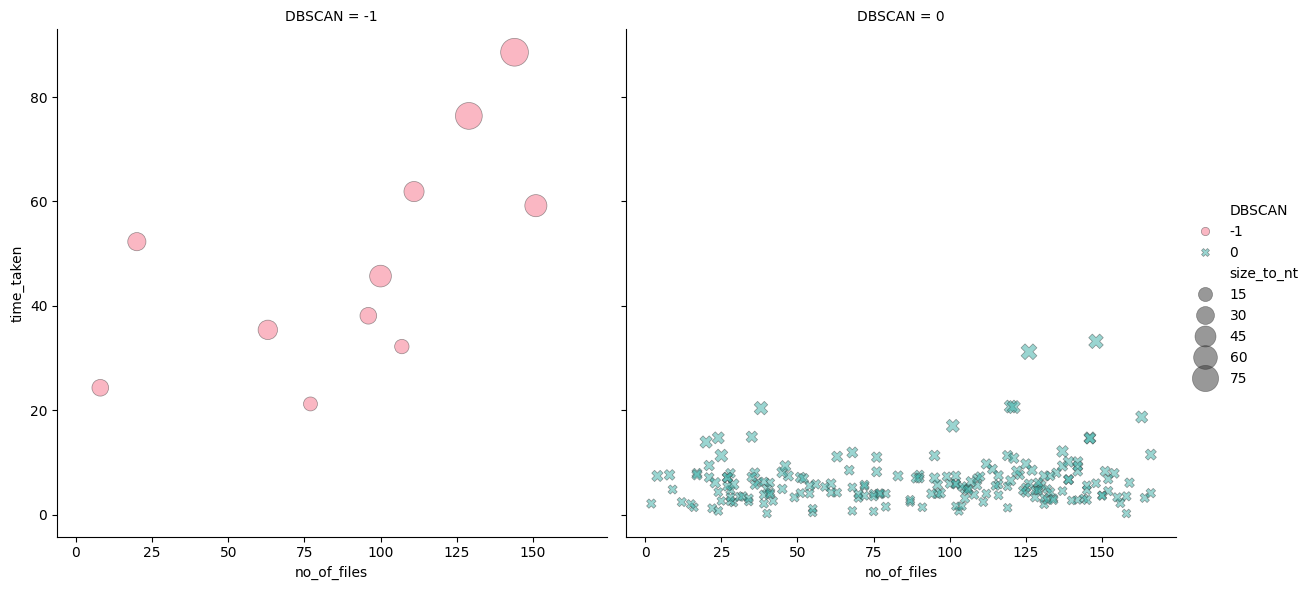

In [ ]:
test_data['DBSCAN'] = p2.fit_predict(test_data.drop(['LOF'], axis=1)) # Predict on the test_data

# Visualize the results
sns.relplot(x="no_of_files", y="time_taken", col = "DBSCAN",hue="DBSCAN",style="DBSCAN",  size="size_to_nt",
            sizes=(40, 400),edgecolor=".2", linewidth=.5, alpha=.5,
            height=6, data=test_data, palette=sns.color_palette("husl", 2))
plt.show()

In [ ]:
test_data[test_data.DBSCAN == -1]

,total_size,no_of_files,network_throughput,time_taken,size_to_nt,LOF,DBSCAN
521,120.7,100,2.46,45.7,49.065041,-1,-1
101,161.7,107,9.93,32.2,16.283988,1,-1
621,80.6,63,2.16,35.4,37.314815,-1,-1
277,188.4,8,7.50,24.3,25.120000,-1,-1
66,175.8,77,11.96,21.2,14.698997,1,-1
436,188.3,96,7.50,38.1,25.106667,-1,-1
583,185.9,129,2.34,76.4,79.444444,-1,-1
810,156.4,144,1.82,88.6,85.934066,-1,-1
649,188.1,151,3.69,59.2,50.975610,-1,-1
314,150.5,20,4.78,52.3,31.485356,-1,-1


Isolation Forest Model

In [ ]:
p3 = Pipeline(steps=[('preprocessor', MinMaxScaler()), # Normalize the data
 ('model', IsolationForest(
    contamination=0.05, # Proportion of outliers in the data
    random_state=42, # For code reproductability
    n_estimators=100 # Number of decision tree estimators involved.
))])

p3.fit(train_data) # Train the model

Pipeline(steps=[('preprocessor', MinMaxScaler()),
                ('model',
                 IsolationForest(contamination=0.05, random_state=42))])

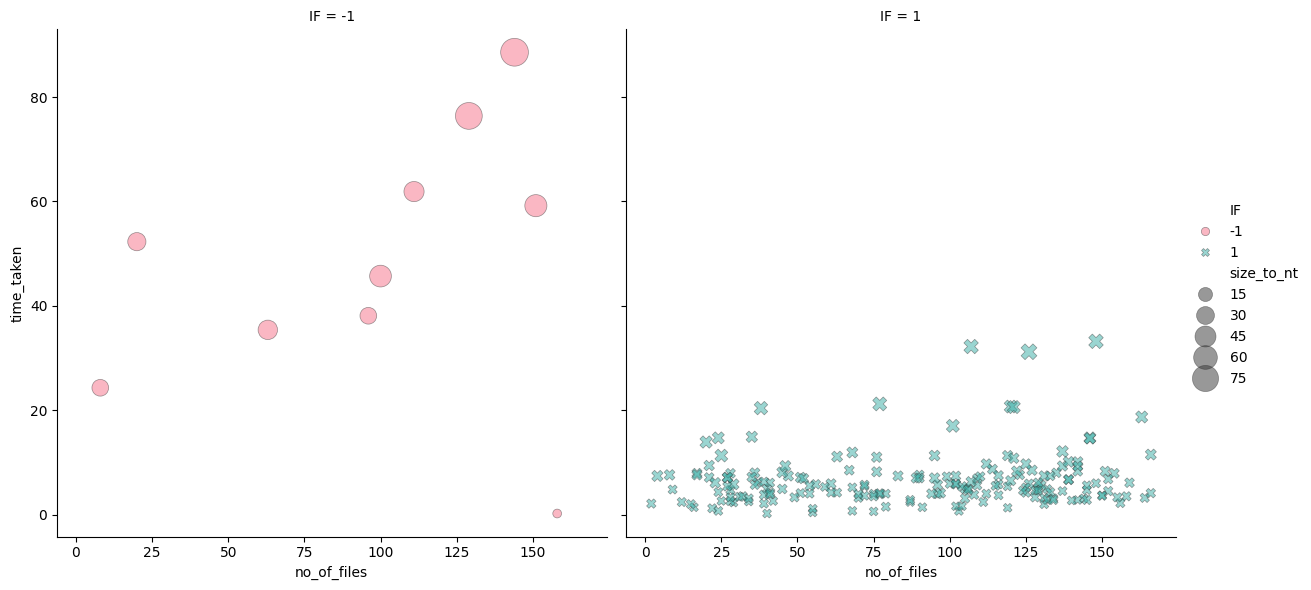

In [ ]:
test_data['IF'] = p3.fit_predict(test_data.drop(['LOF', 'DBSCAN'], axis=1)) # Predict on the test_data

# Plot the results.
sns.relplot(x="no_of_files", y="time_taken", col = "IF",hue="IF",style="IF",  size="size_to_nt",
            sizes=(40, 400),edgecolor=".2", linewidth=.5, alpha=.5,
            height=6, data=test_data, palette=sns.color_palette("husl", 2))
plt.show()

In [ ]:
test_data[test_data.IF == -1]

,total_size,no_of_files,network_throughput,time_taken,size_to_nt,LOF,DBSCAN,IF
521,120.7,100,2.46,45.7,49.065041,-1,-1,-1
621,80.6,63,2.16,35.4,37.314815,-1,-1,-1
277,188.4,8,7.50,24.3,25.120000,-1,-1,-1
436,188.3,96,7.50,38.1,25.106667,-1,-1,-1
583,185.9,129,2.34,76.4,79.444444,-1,-1,-1
810,156.4,144,1.82,88.6,85.934066,-1,-1,-1
649,188.1,151,3.69,59.2,50.975610,-1,-1,-1
314,150.5,20,4.78,52.3,31.485356,-1,-1,-1
355,10.4,158,90.38,0.2,0.115070,-1,0,-1
78,120.4,111,2.95,61.9,40.813559,-1,-1,-1


OUTPUT

Anomaly data points predicted by either of the three models.

In [ ]:
test_data[(test_data.LOF == -1) | (test_data.DBSCAN == -1) | (test_data.IF == -1)]

,total_size,no_of_files,network_throughput,time_taken,size_to_nt,LOF,DBSCAN,IF
521,120.7,100,2.46,45.7,49.065041,-1,-1,-1
101,161.7,107,9.93,32.2,16.283988,1,-1,1
621,80.6,63,2.16,35.4,37.314815,-1,-1,-1
277,188.4,8,7.50,24.3,25.120000,-1,-1,-1
66,175.8,77,11.96,21.2,14.698997,1,-1,1
436,188.3,96,7.50,38.1,25.106667,-1,-1,-1
583,185.9,129,2.34,76.4,79.444444,-1,-1,-1
810,156.4,144,1.82,88.6,85.934066,-1,-1,-1
649,188.1,151,3.69,59.2,50.975610,-1,-1,-1
314,150.5,20,4.78,52.3,31.485356,-1,-1,-1


Anomaly data points which are predicted by all the three models.

In [ ]:
test_data[(test_data.LOF == -1) & (test_data.DBSCAN == -1) & (test_data.IF == -1)]

,total_size,no_of_files,network_throughput,time_taken,size_to_nt,LOF,DBSCAN,IF
521,120.7,100,2.46,45.7,49.065041,-1,-1,-1
621,80.6,63,2.16,35.4,37.314815,-1,-1,-1
277,188.4,8,7.50,24.3,25.120000,-1,-1,-1
436,188.3,96,7.50,38.1,25.106667,-1,-1,-1
583,185.9,129,2.34,76.4,79.444444,-1,-1,-1
810,156.4,144,1.82,88.6,85.934066,-1,-1,-1
649,188.1,151,3.69,59.2,50.975610,-1,-1,-1
314,150.5,20,4.78,52.3,31.485356,-1,-1,-1
78,120.4,111,2.95,61.9,40.813559,-1,-1,-1


In [ ]:
test_data['outlier'] = np.where((test_data.LOF == -1) & (test_data.DBSCAN == -1) & (test_data.IF == -1), 1, 0)
test_data.head()

,total_size,no_of_files,network_throughput,time_taken,size_to_nt,LOF,DBSCAN,IF,outlier
521,120.7,100,2.46,45.7,49.065041,-1,-1,-1,1
737,155.1,56,66.21,5.8,2.342546,1,0,1,0
740,42.9,103,85.19,0.7,0.503580,1,0,1,0
660,19.9,68,33.61,0.7,0.592086,1,0,1,0
411,24.5,102,91.76,1.6,0.267001,1,0,1,0


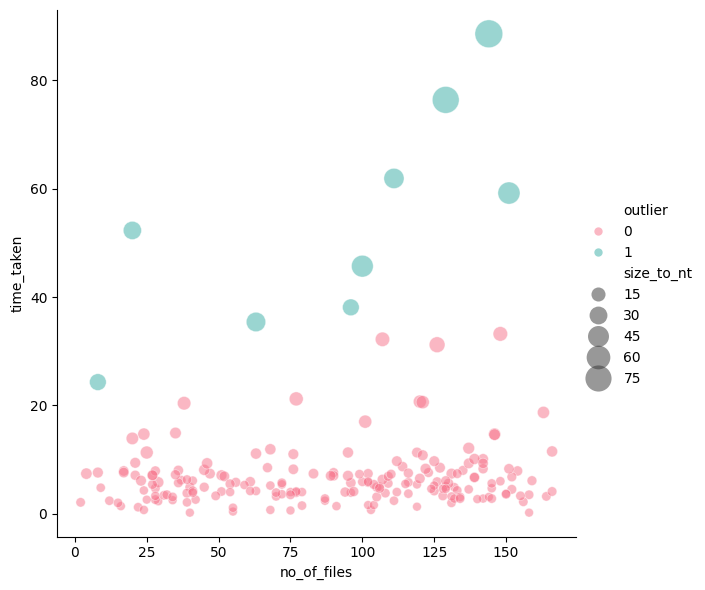

In [ ]:
sns.relplot(x="no_of_files", y="time_taken", hue="outlier", size="size_to_nt",
            sizes=(40, 400), alpha=.5, palette=sns.color_palette("husl", 2),
            height=6, data=test_data)
plt.show()

Outliers predicted by only LOF and DBSCAN Model.

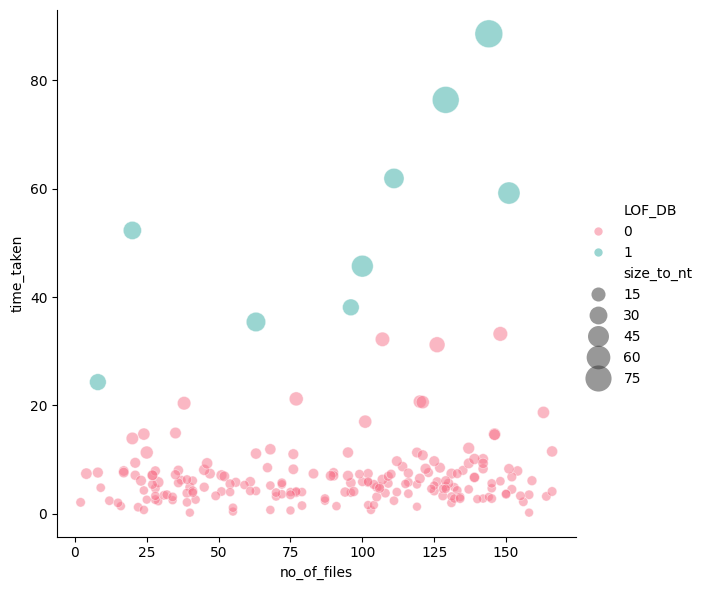

In [ ]:
test_data['LOF_DB'] = np.where((test_data.LOF == -1) & (test_data.DBSCAN == -1), 1, 0)

sns.relplot(x="no_of_files", y="time_taken", hue="LOF_DB", size="size_to_nt",
            sizes=(40, 400), alpha=.5, palette=sns.color_palette("husl", 2),
            height=6, data=test_data)
plt.show()

Outliers predicted by only LOF and Isolation Forest Model.

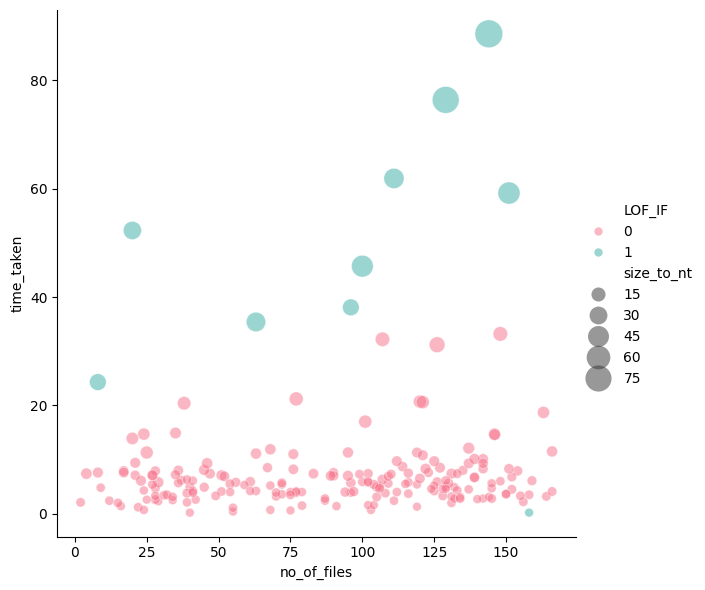

In [ ]:
test_data['LOF_IF'] = np.where((test_data.LOF == -1) & (test_data.IF == -1), 1, 0)

sns.relplot(x="no_of_files", y="time_taken", hue="LOF_IF", size="size_to_nt",
            sizes=(40, 400), alpha=.5, palette=sns.color_palette("husl", 2),
            height=6, data=test_data)
plt.show()

Outliers predicted by only DBSCAN and Isolation Forest Model.

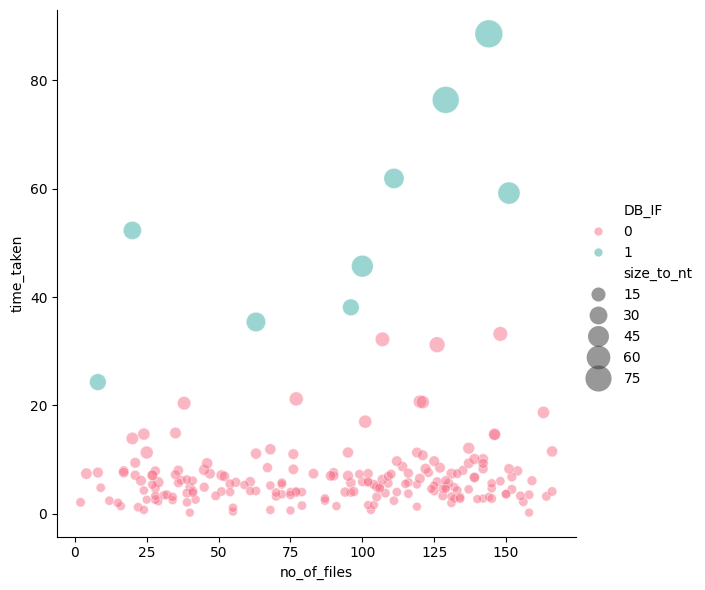

In [ ]:
test_data['DB_IF'] = np.where((test_data.IF == -1) & (test_data.DBSCAN == -1), 1, 0)

sns.relplot(x="no_of_files", y="time_taken", hue="DB_IF", size="size_to_nt",
            sizes=(40, 400), alpha=.5, palette=sns.color_palette("husl", 2),
            height=6, data=test_data)
plt.show()